In [1]:
!pip install healpy
!pip install treecorr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 19.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp
import treecorr

# P2.1 : Working and plotting data on the celestial sphere with healpy

In this exercise you will generate all-sky maps for different NSIDE parameters.

#### For NSIDE = $2^0$ make an array of size npix with np.arange

 - Use the equation provided in the lab manual to first compute the number of pixels (npix) for the given NSIDE.
 - Compare your result the output of hp.nside2npix command

 The first few functions are already written to help you get started!

In [6]:
NSIDE = 1
npix_healpy = hp.nside2npix(nside=NSIDE)
print(npix_healpy)

12


In [7]:
npix = 12*NSIDE**2 # write the relevant equation from the manual and compare the value of npix with npix_healpy above
print(npix)

12


 - Use np.arange to create an array of size npix and print it

In [8]:
map_arr = np.arange(npix)
print(map_arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


#### Visualize the array in healpy map format using the function hp.mollview (https://healpy.readthedocs.io/en/latest/generated/healpy.visufunc.mollview.html).

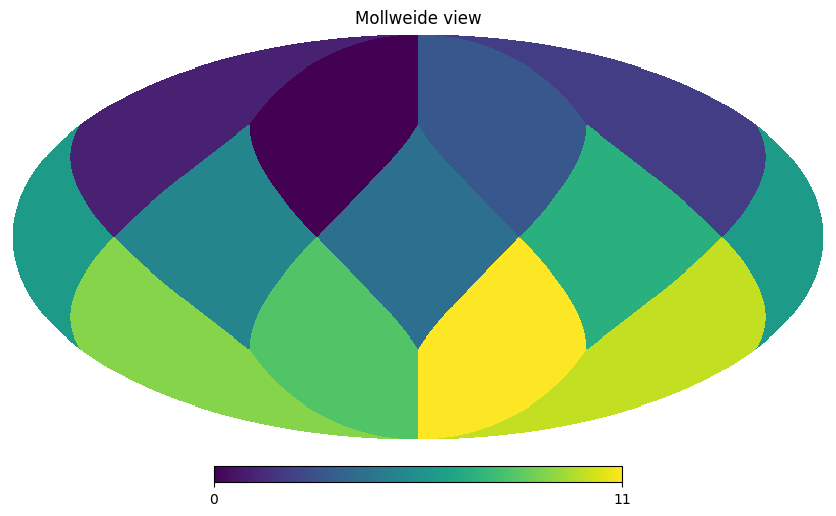

In [ ]:
hp.mollview(map_arr);

For NSIDE = $2^0$, notice the colour scheme of the pixels (from dark to light pixels) --> see how the pixels are arranged. Try to figure out which one is the first and which one is the last pixel. For example: zeroth index starts at the north pole left to the meridian.

#### Calculate the $\theta_{pixel}$ for this NSIDE using hp.nside2pixarea (https://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.nside2pixarea.html) and the relevant equation provided in the lab manual

Remember to give your answer in degrees and also in arcmins.

In [9]:
# Write your code here. Add more coding cells as needed.
pixel_area=hp.nside2pixarea(nside=NSIDE)
print(pixel_area)
theta_pixel=np.sqrt(pixel_area)
print(theta_pixel)

print('theta in arcmin=', theta_pixel*60)

1.0471975511965976
1.0233267079464885
theta in arcmin= 61.39960247678931


#### Repeat all the above exercises for NSIDE = $2^1, 2^2, 2^3, 2^{11}$. Visualize the changes at map level and also compute the number of pixels and pixel scale for the different NSIDE

npix for = 48
npix for = 192
npix for = 768
npix for = 50331648
pixel areas= 0.2617993877991494
theta= 0.5116633539732443
theta in arcmin= 30.699801238394656
pixel areas= 0.06544984694978735
theta= 0.2558316769866221
theta in arcmin= 15.349900619197328
pixel areas= 0.016362461737446838
theta= 0.12791583849331106
theta in arcmin= 7.674950309598664
pixel areas= 2.4967135219492856e-07
theta= 0.0004996712441144963
theta in arcmin= 0.02998027464686978


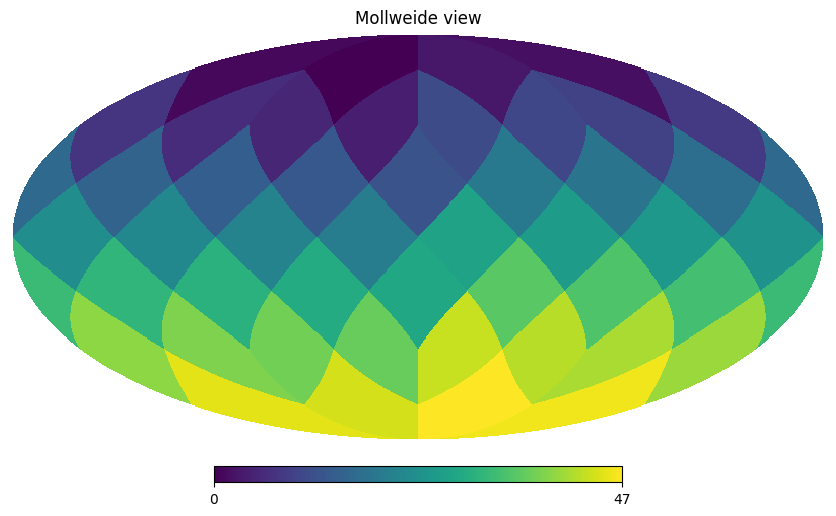

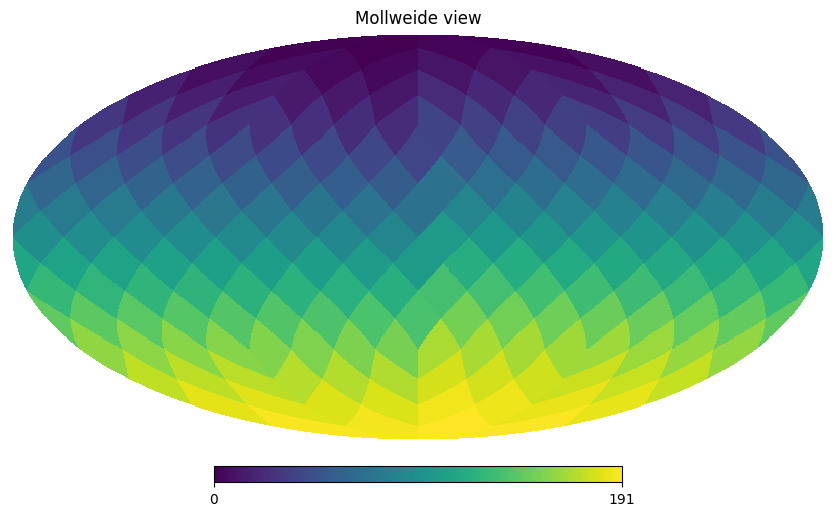

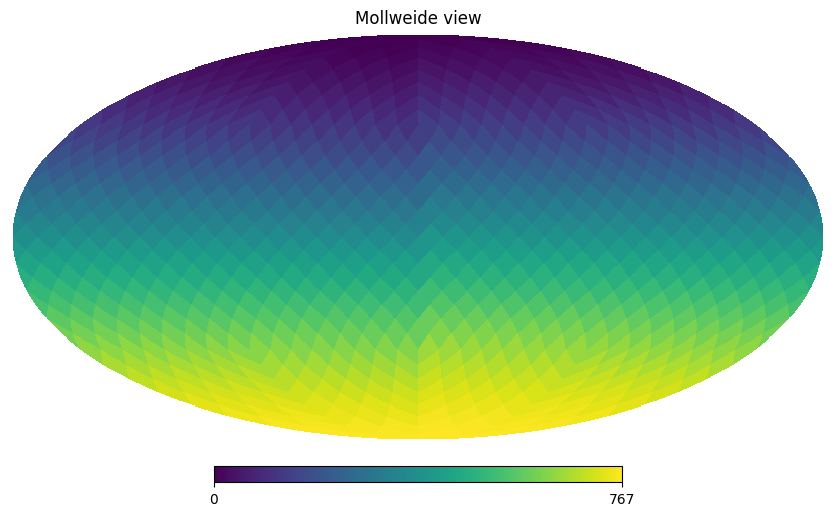

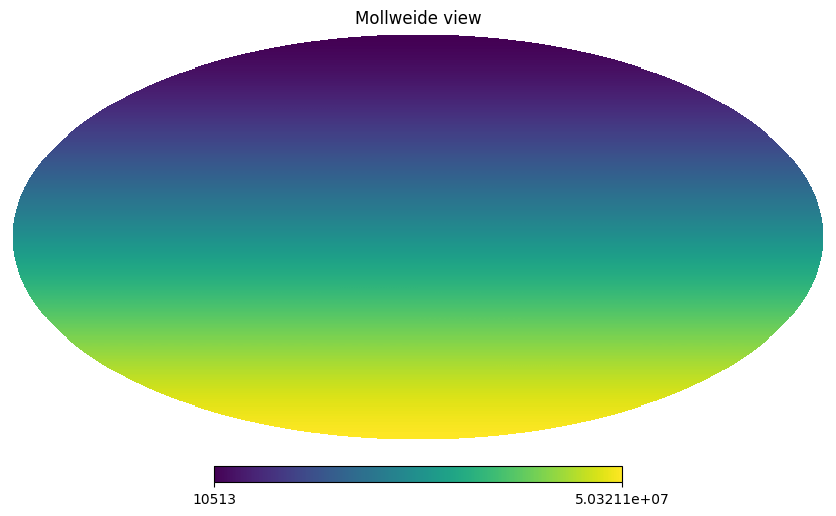

In [10]:
# Write your code here. Add more coding cells as needed.
NSIDE_arr=np.array([2,2**2,2**3,2**11])
npix_arr= 12*NSIDE_arr**2

for k in npix_arr:
  map_arr2=np.arange(k)
  #print('map_arr=',map_arr2)
  hp.mollview(map_arr2)

for i in NSIDE_arr:
    npix_healpy = hp.nside2npix(nside=i)
    print('npix for =',npix_healpy)

for j in NSIDE_arr:
    pixel_area=hp.nside2pixarea(nside=j)
    print('pixel areas=',pixel_area)
    theta_pixel=np.sqrt(pixel_area)
    print('theta=',theta_pixel)
    print('theta in arcmin=', theta_pixel*60)

**For our lab we will be working with NSIDE = $2^{11}$. This is the same resolution as the weak lensing shear maps we will use from the Takahashi (T17) simulations.**

# P2.2 : Extracting circular patches on the sphere with healpy

In this exercise you will query a circular patch (disc) with a certain radius at a specified position on the NSIDE = $2^{11}$ map that you have created above. In order to do so:

- First specify the center of the patch in angular spherical coordinates and the radius of the patch (use 2.5 degrees as the angular radius of the patch). To achieve this, use the function hp.ang2vec(theta, phi) to get the normalised unit vector of the center of the patch at the angular spherical coordinates theta and phi of the patch center.

In [11]:
# Write your code here. Add more coding cells as needed.
# colatitude theta= 0 at north pole, pi/2 at equator, pi at south pole
# longitude phi= 0 to 2pi center to east
NSIDE=2**11
theta= np.pi/2
phi= 3*np.pi/4
ang_radius= 2.5 #degrees
vec=hp.ang2vec(theta,phi)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


- Then query a circular disc of desired radius (in radians) using the function hp.query_disc(NSIDE, vec=vec, radius=np.radians(radius_patch)) . This will return all the pixel indices of the above map which fall within the disc

In [12]:
# Write your code here. Add more coding cells as needed.
radius_patch=2.5
image_disc=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius))
print(image_disc)

[24075258 24075259 24075260 ... 26254340 26254341 26254342]


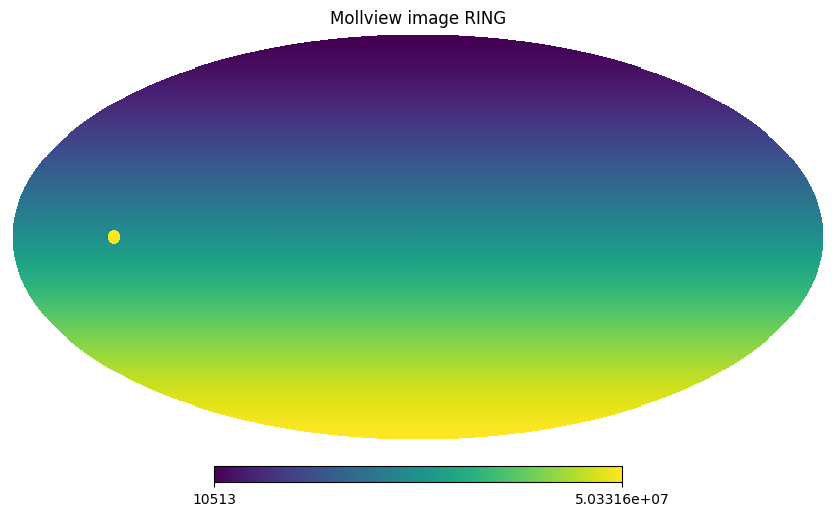

In [13]:
NPIX = hp.nside2npix(NSIDE)
m = np.arange(NPIX)
m[image_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

- Now assign a value of 1 to all these disc pixels and visualise the corresponding map


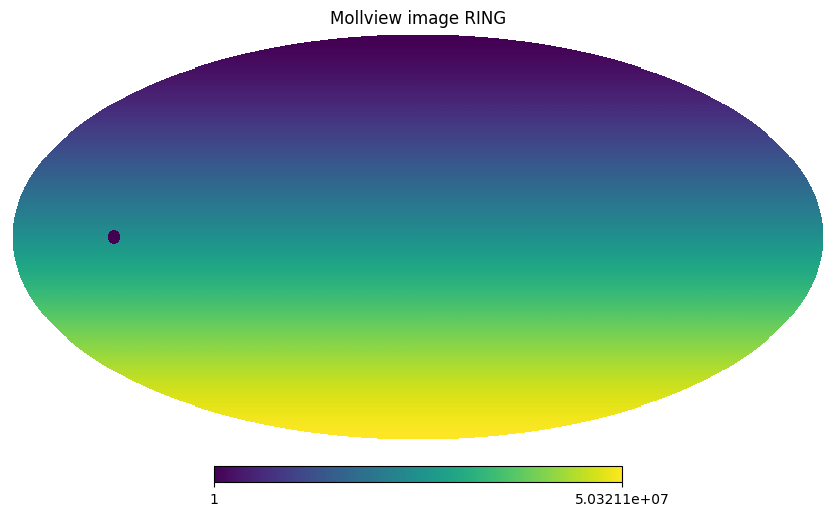

In [ ]:
# Write your code here. Add more coding cells as needed.
NPIX = hp.nside2npix(NSIDE)
m = np.arange(NPIX)
m[image_disc]=1
hp.mollview(m, title="Mollview image RING")


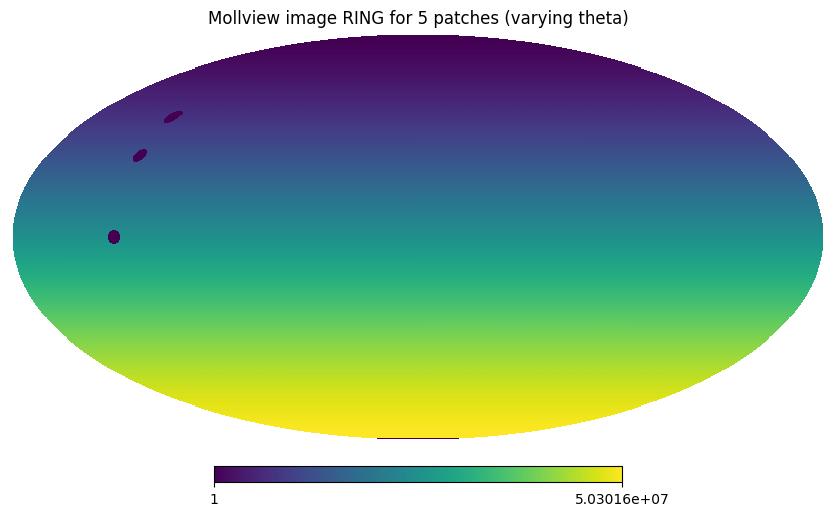

In [14]:
# 5 different patches
image_disc_arr=[]
vec_arr=[]
theta_arr=np.array([0,np.pi/4,np.pi/2,np.pi/3,np.pi])
#phi_arr=np.array([0,np.pi/4,np.pi/2,3*np.pi/2,2*np.pi])

for i in theta_arr:
    vec=hp.ang2vec(i,phi)
    vec_arr.append(vec)
    image_disc=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius))
    image_disc_arr.append(image_disc)
    #print(image_disc)

NPIX = hp.nside2npix(NSIDE)
m_theta = np.arange(NPIX)
for j in image_disc_arr:
    m_theta[j]=1

hp.mollview(m_theta, title="Mollview image RING for 5 patches (varying theta)")
    #hp.mollview(m)
#m[image_disc] = m.max()

- On the map draw 5 separate non-overlapping circular patches (use a loop) and visualize the final map

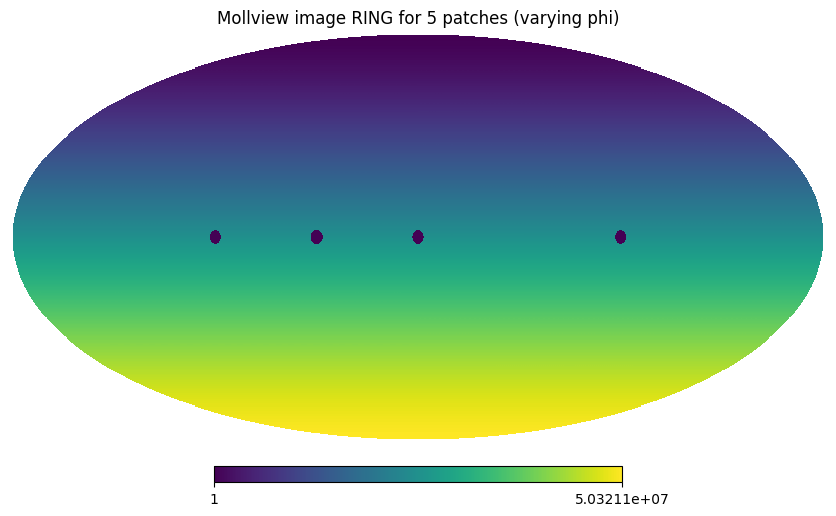

In [15]:
# 5 different patches
image_disc_arr=[]
vec_arr=[]
theta_arr=np.array([0,np.pi/4,np.pi/2,np.pi/3,np.pi])
phi_arr=np.array([0,np.pi/4,np.pi/2,3*np.pi/2,2*np.pi])
for i in phi_arr:
    vec=hp.ang2vec(theta,i)
    vec_arr.append(vec)
    image_disc=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius))
    image_disc_arr.append(image_disc)
    #print(image_disc)

NPIX = hp.nside2npix(NSIDE)
m_phi = np.arange(NPIX)
for j in image_disc_arr:
    m_phi[j]=1

hp.mollview(m_phi, title="Mollview image RING for 5 patches (varying phi)")
    #hp.mollview(m)
#m[image_disc] = m.max()

# P2.3: Importing and checking the simulated weak lensing shear maps from Takahashi simulations (T17)

In this exercise you will import the publicly available Takahashi (T17) simulation weak lensing shear ($\gamma_1$ and $\gamma_2$ components) as healpix maps

For details about the simulation, refer to: http://cosmo.phys.hirosaki-u.ac.jp/takahasi/allsky_raytracing/). For the lab we will be using the shear maps at 2 different source redshifts at $z_{s,1}$ = 0.5739 and $z_{s,2}$ = 1.0334. The maps are already downloaded in the directory you are working in. We will initially start with only the $z_{s,1}$ map

- Load (use hp.read_map) both the $\gamma_1$ and $\gamma_2$ components of the shear map at source redshift $z_{s,1}$ and visualize them. Check how many pixels are there in each shear map and verify that it corresponds to NSIDE = $2^{11}$.

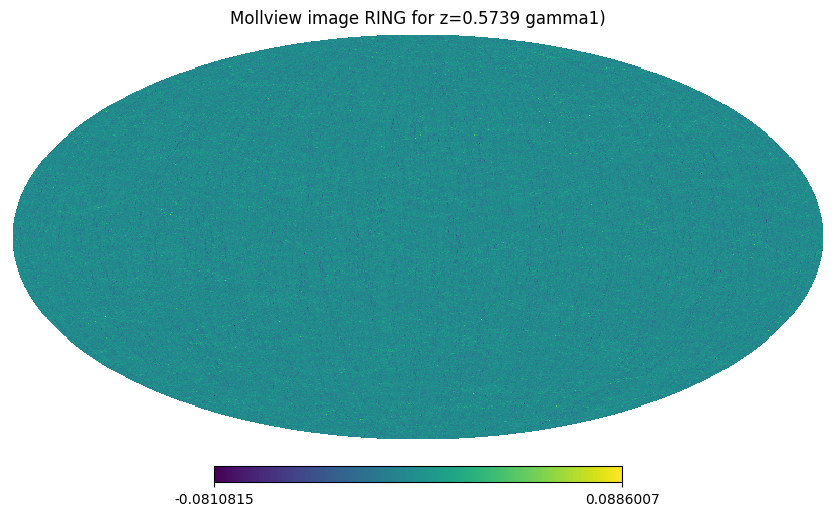

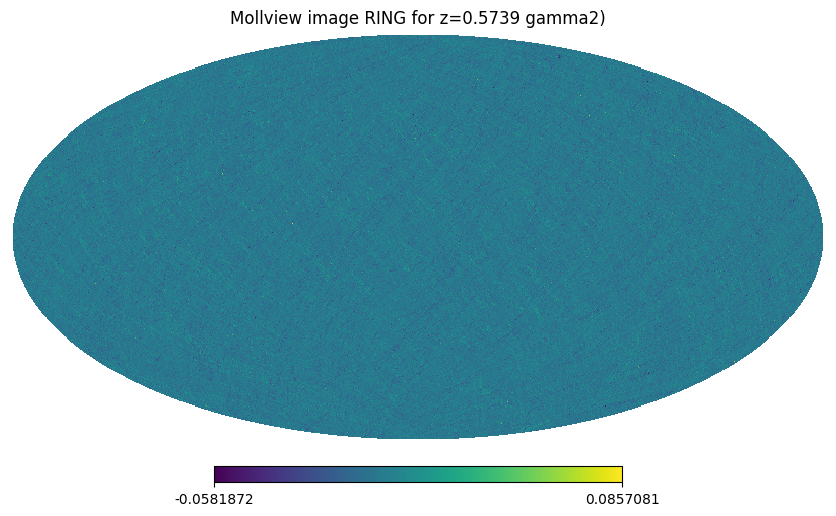

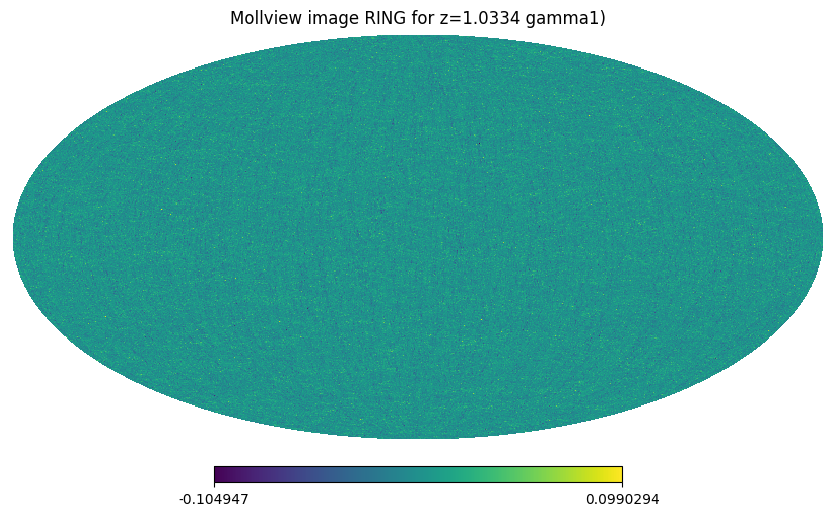

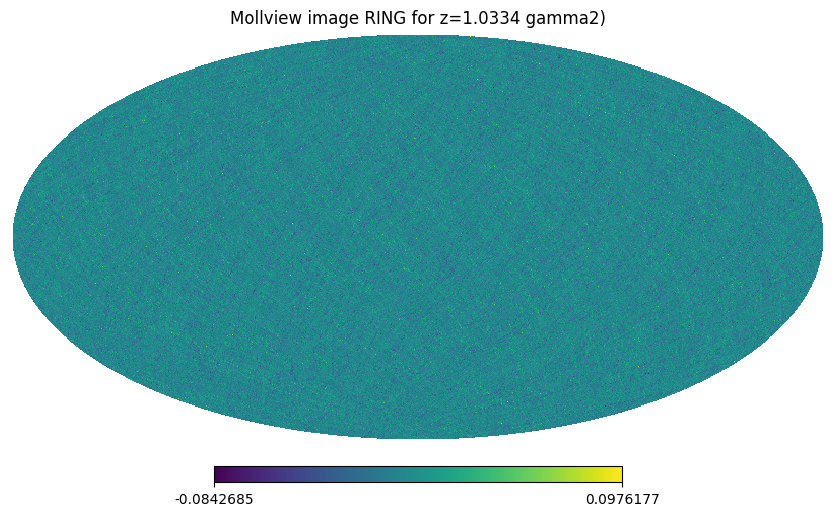

In [3]:
gamma1_z1=hp.read_map('allskymap_NSIDE2048_r000_zsource_0.5739_gamma1.fits')
gamma2_z1=hp.read_map('allskymap_NSIDE2048_r000_zsource_0.5739_gamma2.fits')

gamma1_z2=hp.read_map('allskymap_NSIDE2048_r000_zsource_1.0334_gamma1.fits')
gamma2_z2=hp.read_map('allskymap_NSIDE2048_r000_zsource_1.0334_gamma2.fits')

hp.mollview(gamma1_z1, title="Mollview image RING for z=0.5739 gamma1)")
hp.mollview(gamma2_z1, title="Mollview image RING for z=0.5739 gamma2)")

hp.mollview(gamma1_z2, title="Mollview image RING for z=1.0334 gamma1)")
hp.mollview(gamma2_z2, title="Mollview image RING for z=1.0334 gamma2)")

In [4]:
# Check how many pixels are there in each shear map and verify that it corresponds to NSIDE = 2**11 .
npix1=len(gamma1_z1)
npix2=len(gamma2_z1)
npix3=len(gamma1_z2)
npix4=len(gamma2_z2)

print('for gamma1_z1=',npix1)
print('for gamma2_z1=',npix2)
print('for gamma1_z2=',npix3)
print('for gamma2_z2=',npix4)

NDISK1=np.sqrt(npix1/12)
print('NDISK1=',NDISK1)
NDISK2=np.sqrt(npix2/12)
print('NDISK2=',NDISK2)
NDISK3=np.sqrt(npix3/12)
print('NDISK3=',NDISK3)
NDISK4=np.sqrt(npix4/12)
print('NDISK4=',NDISK4)


for gamma1_z1= 50331648
for gamma2_z1= 50331648
for gamma1_z2= 50331648
for gamma2_z2= 50331648
NDISK1= 2048.0
NDISK2= 2048.0
NDISK3= 2048.0
NDISK4= 2048.0


# P2.4: Working with *treecorr*: package to compute shear two-point correlation functions (2PCFs)

In order to measure the shear 2PCFs $\xi_{\pm}$ from the $\gamma_1$ and $\gamma_2$ maps at source redshift $z_{s,1}$ you have visualized above you will use the publicly available code package treecorr (https://rmjarvis.github.io/TreeCorr/_build/html/index.html).

Treecorr has many functionalities (computing different kinds of 2-point correlations and also 3-point correlations). As we are interested in computing specifically the shear-shear 2PCF we will use the GGCorrelation module. Read  up about it in https://rmjarvis.github.io/TreeCorr/_build/html/gg.html

- Firstly, treecorr needs access to the shear $\gamma_1$ and $\gamma_2$ data in the form of the  values and the associated ra and dec of the shear pixels. Use the pixel indices of one of the circular discs you had extracted in P2.2, compute the ra and dec of those pixels using the function provided below

In [16]:
def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec

image_disc_arr=[]
vec_arr=[]
theta_arr=np.array([0,np.pi/4,np.pi/2,np.pi/3,np.pi])
#phi_arr=np.array([0,np.pi/4,np.pi/2,3*np.pi/2,2*np.pi])
"""
for i in theta_arr:
    vec=hp.ang2vec(i,phi)
    vec_arr.append(vec)
    image_disc=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius))
    image_disc_arr.append(image_disc)
    #print(image_disc)
"""
theta=np.pi/2
phi=(3/4)*np.pi
vec=hp.ang2vec(theta,phi)
image_disc=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius))
#image_disc_arcmin=hp.query_disc(NSIDE, vec=vec, radius=np.arcmins(ang_radius))
#image_disc_arcmin=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius)*3437.75)
print(image_disc)
pixel_indices = image_disc
ra, dec = pixel2RaDec(pixel_indices, NSIDE)
print('RA in arcmin=',ra*3437,75,dec)

[24075258 24075259 24075260 ... 26254340 26254341 26254342]
RA in arcmin= [8082.42358689 8085.05973287 8087.69587886 ... 8108.78504673 8111.42119271
 8114.05733869] 75 [ 0.04330781  0.04330781  0.04330781 ... -0.04330781 -0.04330781
 -0.04330781]


In [17]:

def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec

image_disc_arr=[]
vec_arr=[]
theta_arr=np.array([0,np.pi/4,np.pi/2,np.pi/3,np.pi])
#phi_arr=np.array([0,np.pi/4,np.pi/2,3*np.pi/2,2*np.pi])
"""
for i in theta_arr:
    vec=hp.ang2vec(i,phi)
    vec_arr.append(vec)
    image_disc=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius))
    image_disc_arr.append(image_disc)
    #print(image_disc)
"""
theta=np.pi/2
phi=(3/4)*np.pi
vec=hp.ang2vec(theta,phi)
image_disc=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius))
#image_disc_arcmin=hp.query_disc(NSIDE, vec=vec, radius=np.arcmins(ang_radius))
#image_disc_arcmin=hp.query_disc(NSIDE, vec=vec, radius=np.radians(ang_radius)*3437.75)
print(image_disc)
pixel_indices = image_disc
ra, dec = pixel2RaDec(pixel_indices, NSIDE)
print('RA in arcmin=',ra*3437.75,dec)

[24075258 24075259 24075260 ... 26254340 26254341 26254342]
RA in arcmin= [8084.1872813  8086.82400252 8089.46072375 ... 8110.55449357 8113.19121479
 8115.82793602] [ 0.04330781  0.04330781  0.04330781 ... -0.04330781 -0.04330781
 -0.04330781]


In [ ]:
# Write your code here. Add more coding cells as needed.

- Print out the gamma1 and gamma2 values of these extracted pixels

In [18]:
# gamma1 and gamma2
gamma1_extracted=gamma1_z1[image_disc]
gamma2_extracted=gamma2_z1[image_disc]
print('gamma1=',gamma1_extracted)
print('gamma2=',gamma2_extracted)

gamma1= [ 0.00188223 -0.00583691  0.00798392 ...  0.01219241  0.00882074
  0.0078788 ]
gamma2= [-0.00994953  0.00328291  0.00573825 ...  0.00026805  0.00266363
 -0.0089837 ]


- Create a treecorr catalog (use https://rmjarvis.github.io/TreeCorr/_build/html/catalog.html) which contains the ra, dec, gamma1, gamma2, ra_units and dec_units of those extracted pixels. IMPORTANT: You will also need to set the flip_g1=True in the catalog (due to the convention adopted in the Takhashi simulation)

In [19]:
cat = treecorr.Catalog(ra=ra, dec=dec, g1=gamma1_extracted, g2=gamma2_extracted,
                       ra_units='arcmin', dec_units='arcmin',flip_g1=True)
cat

treecorr.Catalog(ra=array([0.00068405, 0.00068427, 0.0006845 , ..., 0.00068628, 0.0006865 ,
       0.00068673]),ra_units='rad',dec=array([ 1.25977305e-05,  1.25977305e-05,  1.25977305e-05, ...,
       -1.25977305e-05, -1.25977305e-05, -1.25977305e-05]),dec_units='rad',g1=array([-0.00188223,  0.00583691, -0.00798392, ..., -0.01219241,
       -0.00882074, -0.0078788 ]),g2=array([-0.00994953,  0.00328291,  0.00573825, ...,  0.00026805,
        0.00266363, -0.0089837 ]))

- Then create a GGCorrelation (https://rmjarvis.github.io/TreeCorr/_build/html/gg.html) instance where you provide the minimum, maximum and the total number of angular separations within which you want to compute the correlations. You'll also need to provide the separation units. Compute the correlations from 5-140 arcmins in 20 bins logarithmically spaced.

Bin  0: ⟨θ⟩ =   5.443′,  ξ₊ = 1.632e-05,  ξ₋ = 7.312e-06,  Var(ξ₊) = 1.138e-14
Bin  1: ⟨θ⟩ =   6.803′,  ξ₊ = 1.266e-05,  ξ₋ = 7.286e-06,  Var(ξ₊) = 1.471e-14
Bin  2: ⟨θ⟩ =   7.692′,  ξ₊ = 1.110e-05,  ξ₋ = 6.309e-06,  Var(ξ₊) = 1.206e-14
Bin  3: ⟨θ⟩ =   9.027′,  ξ₊ = 9.719e-06,  ξ₋ = 6.818e-06,  Var(ξ₊) = 7.386e-15
Bin  4: ⟨θ⟩ =  10.642′,  ξ₊ = 8.113e-06,  ξ₋ = 5.951e-06,  Var(ξ₊) = 5.103e-15
Bin  5: ⟨θ⟩ =  12.499′,  ξ₊ = 6.951e-06,  ξ₋ = 5.283e-06,  Var(ξ₊) = 4.203e-15
Bin  6: ⟨θ⟩ =  14.774′,  ξ₊ = 5.881e-06,  ξ₋ = 4.848e-06,  Var(ξ₊) = 2.636e-15
Bin  7: ⟨θ⟩ =  17.562′,  ξ₊ = 5.261e-06,  ξ₋ = 4.342e-06,  Var(ξ₊) = 1.956e-15
Bin  8: ⟨θ⟩ =  20.717′,  ξ₊ = 4.837e-06,  ξ₋ = 3.651e-06,  Var(ξ₊) = 1.487e-15
Bin  9: ⟨θ⟩ =  24.463′,  ξ₊ = 4.051e-06,  ξ₋ = 2.860e-06,  Var(ξ₊) = 1.044e-15
Bin 10: ⟨θ⟩ =  28.899′,  ξ₊ = 3.894e-06,  ξ₋ = 2.685e-06,  Var(ξ₊) = 7.781e-16
Bin 11: ⟨θ⟩ =  34.152′,  ξ₊ = 3.192e-06,  ξ₋ = 1.833e-06,  Var(ξ₊) = 5.675e-16
Bin 12: ⟨θ⟩ =  40.347′,  ξ₊ = 2.268e-06,  ξ₋ = 1.487

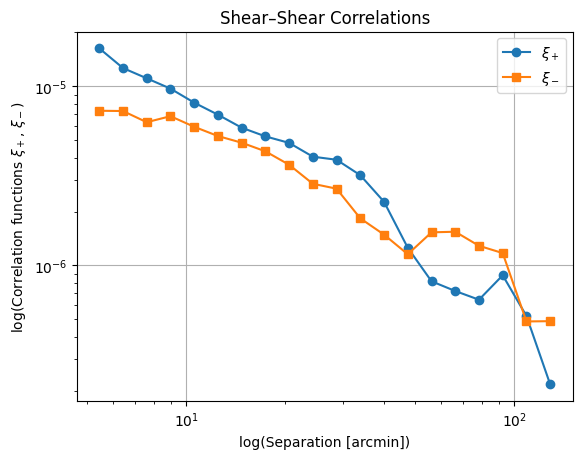

In [21]:
import treecorr

# -- 1) Build the TreeCorr catalog --
# Assume you already have:
#   ra, dec           : 1D arrays of pixel coordinates in degrees
#   gamma1_disc, gamma2_disc : 1D arrays of the shear components

cat = treecorr.Catalog(
    ra=ra*3437.75,
    dec=dec*3437.75,
    g1=gamma1_extracted,
    g2=gamma2_extracted,
    ra_units='arcmin',
    dec_units='arcmin',
    flip_g1=True      # required for Takahashi convention
)

# -- 2) Set up GGCorrelation in 20 log‑spaced bins from 5 to 140 arcmin --
gg = treecorr.GGCorrelation(
    min_sep=5.0,      # minimum separation [arcmin]
    max_sep=140.0,    # maximum separation [arcmin]
    nbins=20,         # total number of logarithmic bins
    sep_units='arcmin'
)

# -- 3) Compute the shear–shear correlation --
gg.process(cat)

# -- 4) Access results --
#   gg.meanr : mean separation of each bin [arcmin]
#   gg.xip   : xi_+ in each bin
#   gg.xim   : xi_- in each bin
#   gg.cov   : full covariance matrix (diag[0..nbins-1] = var(xi+))

for i in range(gg.nbins):
    var_xip = gg.cov[i, i]
    print(f"Bin {i:2d}: ⟨θ⟩ = {gg.meanr[i]:7.3f}′,  ξ₊ = {gg.xip[i]:.3e},  ξ₋ = {gg.xim[i]:.3e},  Var(ξ₊) = {var_xip:.3e}")
# 1. Nominal bin centers [arcmin]
rnom = gg.rnom

# 2. Correlation functions
xip = gg.xip
xim = gg.xim

# 3. Plot
plt.figure()
plt.plot(rnom, xip, marker='o', linestyle='-')
plt.plot(rnom, xim, marker='s', linestyle='-')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('log(Separation [arcmin])')
plt.ylabel(r'log(Correlation functions $\xi_+$, $\xi_-$)')
plt.title('Shear–Shear Correlations')
plt.legend([r'$\xi_+$', r'$\xi_-$'])
plt.grid(True)
plt.show()

- Finally, in order to compute the $\xi_{\pm}$ shear 2PCFs, insert the catalog you have created above into the GG instance using the function process().

In [22]:
# Write your code here. Add more coding cells as needed.
# -- 3) Compute the shear–shear correlation --
gg.process(cat)

for i in range(gg.nbins):
    var_xip = gg.cov[i, i]
    print(f"Bin {i:2d}: ⟨θ⟩ = {gg.meanr[i]:7.3f}′,  ξ₊ = {gg.xip[i]:.3e},  ξ₋ = {gg.xim[i]:.3e},  Var(ξ₊) = {var_xip:.3e}")
# 1. Nominal bin centers [arcmin]
rnom = gg.rnom

Bin  0: ⟨θ⟩ =   5.443′,  ξ₊ = 1.632e-05,  ξ₋ = 7.312e-06,  Var(ξ₊) = 1.138e-14
Bin  1: ⟨θ⟩ =   6.803′,  ξ₊ = 1.266e-05,  ξ₋ = 7.286e-06,  Var(ξ₊) = 1.471e-14
Bin  2: ⟨θ⟩ =   7.692′,  ξ₊ = 1.110e-05,  ξ₋ = 6.309e-06,  Var(ξ₊) = 1.206e-14
Bin  3: ⟨θ⟩ =   9.027′,  ξ₊ = 9.719e-06,  ξ₋ = 6.818e-06,  Var(ξ₊) = 7.386e-15
Bin  4: ⟨θ⟩ =  10.642′,  ξ₊ = 8.113e-06,  ξ₋ = 5.951e-06,  Var(ξ₊) = 5.103e-15
Bin  5: ⟨θ⟩ =  12.499′,  ξ₊ = 6.951e-06,  ξ₋ = 5.283e-06,  Var(ξ₊) = 4.203e-15
Bin  6: ⟨θ⟩ =  14.774′,  ξ₊ = 5.881e-06,  ξ₋ = 4.848e-06,  Var(ξ₊) = 2.636e-15
Bin  7: ⟨θ⟩ =  17.562′,  ξ₊ = 5.261e-06,  ξ₋ = 4.342e-06,  Var(ξ₊) = 1.956e-15
Bin  8: ⟨θ⟩ =  20.717′,  ξ₊ = 4.837e-06,  ξ₋ = 3.651e-06,  Var(ξ₊) = 1.487e-15
Bin  9: ⟨θ⟩ =  24.463′,  ξ₊ = 4.051e-06,  ξ₋ = 2.860e-06,  Var(ξ₊) = 1.044e-15
Bin 10: ⟨θ⟩ =  28.899′,  ξ₊ = 3.894e-06,  ξ₋ = 2.685e-06,  Var(ξ₊) = 7.781e-16
Bin 11: ⟨θ⟩ =  34.152′,  ξ₊ = 3.192e-06,  ξ₋ = 1.833e-06,  Var(ξ₊) = 5.675e-16
Bin 12: ⟨θ⟩ =  40.347′,  ξ₊ = 2.268e-06,  ξ₋ = 1.487

- Call the methods xip and xim of the treecorr GG instance to get the output of the correlation values. Plot them against the angular bins (which you can get from the nominal bin centres, rnom).

In [ ]:
# Write your code here. Add more coding cells as needed.


# P2.5: Computing the average shear 2PCFs in several patches in the $z_{s,1}$ map

In this exercise you will compute the shear 2PCFs within multiple patches in the $z_{s,1}$ map

- Repeat P2.4 for 100 randomly located (preferably non-overlapping) patches on the $z_{s,1}$ map; store the xip and xim computed in 15 bins using treecorr for these 100 patches in a 100x20 array (make separate arrays for xip and xim).

Done!  xip_arr.shape: (100, 20)
       xim_arr.shape: (100, 20)


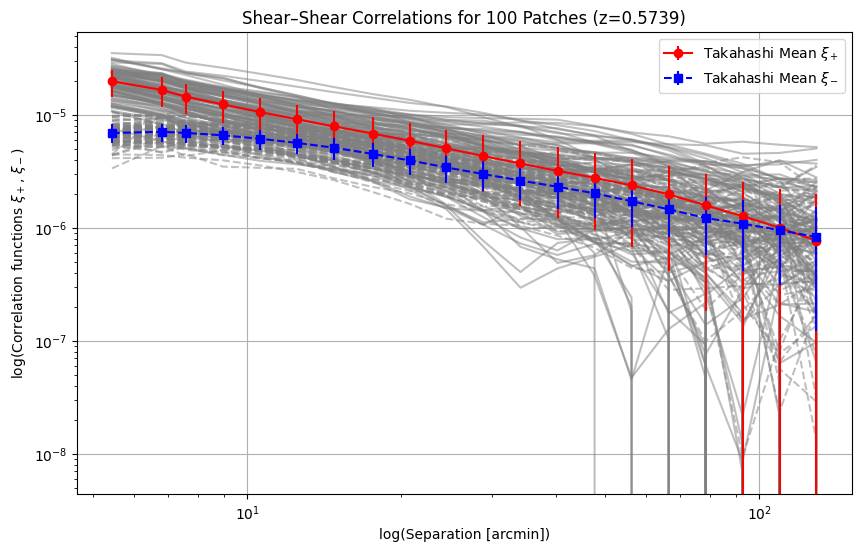

In [31]:
# Write your code here. Add more coding cells as needed.
# ------------------------------------------------------------
# 0.  Imports & data you already have
# ------------------------------------------------------------
import numpy as np
import healpy as hp
import treecorr
from numpy.random import default_rng
import matplotlib.pyplot as plt

# γ maps (already read):
#   gamma1_z1, gamma2_z1  –  full‑sky HEALPix arrays
nside = hp.get_nside(gamma1_z1)
npix  = hp.nside2npix(nside)

# ------------------------------------------------------------
# 1.  Patch geometry  (choose a radius that fits your max_sep)
# ------------------------------------------------------------
patch_radius_deg = 2.5              # 3°  (≈ 180 arcmin > 140 max_sep)
patch_radius_rad = np.radians(patch_radius_deg)

# ------------------------------------------------------------
# 2.  Draw 100 random, non‑overlapping patch centres
# ------------------------------------------------------------
rng          = default_rng(12345)
centers_th   = []
centers_ph   = []

while len(centers_th) < 100:
    # random point on the sphere
    u = rng.random(); v = rng.random()
    theta  = np.arccos(1 - 2*u)          # [0, π]
    phi    = 2 * np.pi * v               # [0, 2π)

    # check against existing centres
    ok = True
    for th0, ph0 in zip(centers_th, centers_ph):
        # great‑circle distance
        cos_d = (np.sin(th0)*np.sin(theta)*np.cos(ph0-phi) +
                 np.cos(th0)*np.cos(theta))
        d = np.arccos(np.clip(cos_d, -1, 1))
        if d < 2*patch_radius_rad:       # overlap → reject
            ok = False
            break
    if ok:
        centers_th.append(theta)
        centers_ph.append(phi)

centers_th = np.array(centers_th)
centers_ph = np.array(centers_ph)

# ------------------------------------------------------------
# 3.  Pre‑allocate output arrays (100 × 15)
# ------------------------------------------------------------
nbins = 20
xip_arr = np.zeros((100, nbins))
xim_arr = np.zeros((100, nbins))
theta_arr = None                       # store bin centres once

# TreeCorr parameters
gg_cfg = dict(min_sep = 5.0,           # arcmin
              max_sep = 140.0,
              nbins   = nbins,
              sep_units = 'arcmin')

# ------------------------------------------------------------
# 4.  Loop over patches
# ------------------------------------------------------------
for idx, (th0, ph0) in enumerate(zip(centers_th, centers_ph)):

    # 4a) pixel indices inside the disc
    pix = hp.query_disc(nside, vec=hp.ang2vec(th0, ph0),
                        radius=patch_radius_rad, inclusive=False)
    # filter unseen / NaN pixels
    m = (gamma1_z1[pix] != hp.UNSEEN) & np.isfinite(gamma1_z1[pix])
    pix = pix[m]

    if len(pix) < 20:          # skip tiny masks
        xip_arr[idx] = np.nan
        xim_arr[idx] = np.nan
        continue

    # 4b) build the TreeCorr catalogue
    theta, phi = hp.pix2ang(nside, pix)          # radians
    ra  = np.degrees(phi) * 60.0                 # → arcmin
    dec = (90.0 - np.degrees(theta)) * 60.0      # → arcmin

    cat = treecorr.Catalog(
            ra  = ra,
            dec = dec,
            g1  = gamma1_z1[pix],
            g2  = gamma2_z1[pix],
            ra_units  = 'arcmin',
            dec_units = 'arcmin',
            flip_g1   = True)

    # 4c) correlation
    gg = treecorr.GGCorrelation(**gg_cfg)
    gg.process(cat)

    # 4d) store
    xip_arr[idx] = gg.xip
    xim_arr[idx] = gg.xim
    if theta_arr is None:
        theta_arr = gg.meanr           # save bin centres once

    #print(f"Patch {idx+1:3d}/100   Npix={len(pix):6d}")

# ------------------------------------------------------------
# 5.  xip_arr and xim_arr now contain shape = (100, 15)
# ------------------------------------------------------------
print("Done!  xip_arr.shape:", xip_arr.shape)
print("       xim_arr.shape:", xim_arr.shape)

# Compute mean and standard deviation
mean_xip = np.nanmean(xip_arr, axis=0)
std_xip = np.nanstd(xip_arr, axis=0)
mean_xim = np.nanmean(xim_arr, axis=0)
std_xim = np.nanstd(xim_arr, axis=0)

# Plot individual 2PCFs
plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(theta_arr, xip_arr[i, :], color='grey', alpha=0.5)
    plt.plot(theta_arr, xim_arr[i, :], color='grey', alpha=0.5, linestyle='--')

# Plot mean with error bars
plt.errorbar(theta_arr, mean_xip, yerr=std_xip, color='red', marker='o', linestyle='-', label=r'Takahashi Mean $\xi_+$')
plt.errorbar(theta_arr, mean_xim, yerr=std_xim, color='blue', marker='s', linestyle='--', label=r'Takahashi Mean $\xi_-$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Separation [arcmin])')
plt.ylabel(r'log(Correlation functions $\xi_+$, $\xi_-$)')
plt.title('Shear–Shear Correlations for 100 Patches (z=0.5739)')
plt.legend()
plt.grid(True)
plt.show()

#in degrees z1

Done!  xip_arr.shape: (100, 20)
       xim_arr.shape: (100, 20)


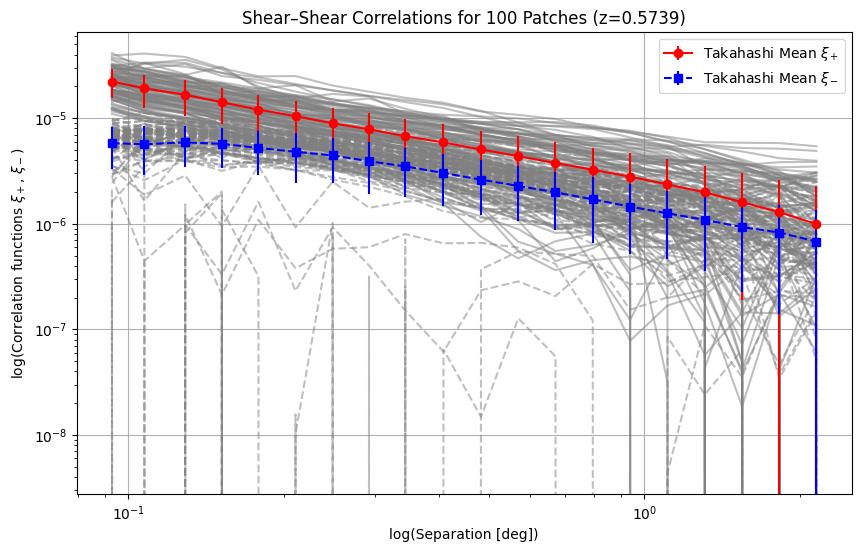

In [32]:
# SAME BUT WITH DEGREES
# ------------------------------------------------------------
# 0.  Imports & data you already have
# ------------------------------------------------------------
import numpy as np
import healpy as hp
import treecorr
from numpy.random import default_rng
import matplotlib.pyplot as plt

# γ maps (already read):
#   gamma1_z1, gamma2_z1  –  full‑sky HEALPix arrays
nside = hp.get_nside(gamma1_z1)
npix  = hp.nside2npix(nside)

# ------------------------------------------------------------
# 1.  Patch geometry  (choose a radius that fits your max_sep)
# ------------------------------------------------------------
patch_radius_deg = 2.5              # 3°  (≈ 180 arcmin > 140 max_sep)
patch_radius_rad = np.radians(patch_radius_deg)

# ------------------------------------------------------------
# 2.  Draw 100 random, non‑overlapping patch centres
# ------------------------------------------------------------
rng          = default_rng(12345)
centers_th   = []
centers_ph   = []

while len(centers_th) < 100:
    # random point on the sphere
    u = rng.random(); v = rng.random()
    theta  = np.arccos(1 - 2*u)          # [0, π]
    phi    = 2 * np.pi * v               # [0, 2π)

    # check against existing centres
    ok = True
    for th0, ph0 in zip(centers_th, centers_ph):
        # great‑circle distance
        cos_d = (np.sin(th0)*np.sin(theta)*np.cos(ph0-phi) +
                 np.cos(th0)*np.cos(theta))
        d = np.arccos(np.clip(cos_d, -1, 1))
        if d < 2*patch_radius_rad:       # overlap → reject
            ok = False
            break
    if ok:
        centers_th.append(theta)
        centers_ph.append(phi)

centers_th = np.array(centers_th)
centers_ph = np.array(centers_ph)

# ------------------------------------------------------------
# 3.  Pre‑allocate output arrays (100 × 15)
# ------------------------------------------------------------
nbins = 20
xip_arr = np.zeros((100, nbins))
xim_arr = np.zeros((100, nbins))
theta_arr = None                       # store bin centres once

# TreeCorr parameters
gg_cfg = dict(min_sep = 5.0*0.0166667,           # degrees
              max_sep = 140.0*0.0166667,
              nbins   = nbins,
              sep_units = 'arcmin')

# ------------------------------------------------------------
# 4.  Loop over patches
# ------------------------------------------------------------
for idx, (th0, ph0) in enumerate(zip(centers_th, centers_ph)):

    # 4a) pixel indices inside the disc
    pix = hp.query_disc(nside, vec=hp.ang2vec(th0, ph0),
                        radius=patch_radius_rad, inclusive=False)
    # filter unseen / NaN pixels
    m = (gamma1_z1[pix] != hp.UNSEEN) & np.isfinite(gamma1_z1[pix])
    pix = pix[m]

    if len(pix) < 20:          # skip tiny masks
        xip_arr[idx] = np.nan
        xim_arr[idx] = np.nan
        continue

    # 4b) build the TreeCorr catalogue
    theta, phi = hp.pix2ang(nside, pix)          # radians
    ra  = np.degrees(phi) #* 60.0                 # → deg
    dec = (90.0 - np.degrees(theta)) #* 60.0      # → deg

    cat = treecorr.Catalog(
            ra  = ra,
            dec = dec,
            g1  = gamma1_z1[pix],
            g2  = gamma2_z1[pix],
            ra_units  = 'arcmin',
            dec_units = 'arcmin',
            flip_g1   = True)

    # 4c) correlation
    gg = treecorr.GGCorrelation(**gg_cfg)
    gg.process(cat)

    # 4d) store
    xip_arr[idx] = gg.xip
    xim_arr[idx] = gg.xim
    if theta_arr is None:
        theta_arr = gg.meanr           # save bin centres once

    #print(f"Patch {idx+1:3d}/100   Npix={len(pix):6d}")

# ------------------------------------------------------------
# 5.  xip_arr and xim_arr now contain shape = (100, 15)
# ------------------------------------------------------------
print("Done!  xip_arr.shape:", xip_arr.shape)
print("       xim_arr.shape:", xim_arr.shape)

# Compute mean and standard deviation
mean_xip = np.nanmean(xip_arr, axis=0)
std_xip = np.nanstd(xip_arr, axis=0)
mean_xim = np.nanmean(xim_arr, axis=0)
std_xim = np.nanstd(xim_arr, axis=0)

# Plot individual 2PCFs
plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(theta_arr, xip_arr[i, :], color='grey', alpha=0.5)
    plt.plot(theta_arr, xim_arr[i, :], color='grey', alpha=0.5, linestyle='--')

# Plot mean with error bars
plt.errorbar(theta_arr, mean_xip, yerr=std_xip, color='red', marker='o', linestyle='-', label=r'Takahashi Mean $\xi_+$')
plt.errorbar(theta_arr, mean_xim, yerr=std_xim, color='blue', marker='s', linestyle='--', label=r'Takahashi Mean $\xi_-$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Separation [deg])')
plt.ylabel(r'log(Correlation functions $\xi_+$, $\xi_-$)')
plt.title('Shear–Shear Correlations for 100 Patches (z=0.5739)')
plt.legend()
plt.grid(True)
plt.show()

# P2.6: Computing the average shear 2PCFs in several patches in the $z_{s,2}$ map

In this exercise you will compute the shear 2PCFs within multiple patches in the $z_{s,2}$ map

- Repeat P2.5 for the $z_{s,2}$ map

Done!  xip_arr_z2.shape: (100, 20)
       xim_arr_z2.shape: (100, 20)


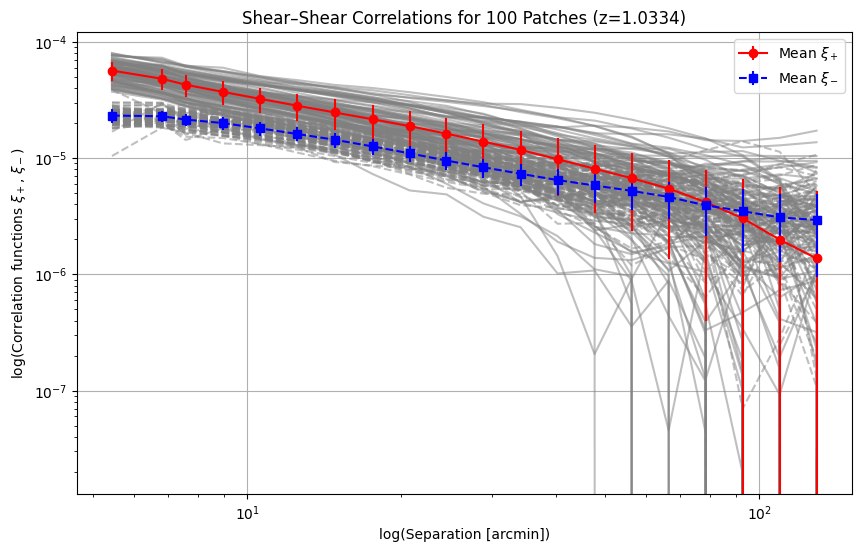

In [33]:
# Write your code here. Add more coding cells as needed.
# Write your code here. Add more coding cells as needed.
# ------------------------------------------------------------
# 0.  Imports & data you already have
# ------------------------------------------------------------
import numpy as np
import healpy as hp
import treecorr
from numpy.random import default_rng
import matplotlib.pyplot as plt

# γ maps (already read):
#   gamma1_z1, gamma2_z1  –  full‑sky HEALPix arrays
nside = hp.get_nside(gamma1_z2)
npix  = hp.nside2npix(nside)

# ------------------------------------------------------------
# 1.  Patch geometry  (choose a radius that fits your max_sep)
# ------------------------------------------------------------
patch_radius_deg = 2.5              # 3°  (≈ 180 arcmin > 140 max_sep)
patch_radius_rad = np.radians(patch_radius_deg)

# ------------------------------------------------------------
# 2.  Draw 100 random, non‑overlapping patch centres
# ------------------------------------------------------------
rng          = default_rng(12345)
centers_th   = []
centers_ph   = []

while len(centers_th) < 100:
    # random point on the sphere
    u = rng.random(); v = rng.random()
    theta  = np.arccos(1 - 2*u)          # [0, π]
    phi    = 2 * np.pi * v               # [0, 2π)

    # check against existing centres
    ok = True
    for th0, ph0 in zip(centers_th, centers_ph):
        # great‑circle distance
        cos_d = (np.sin(th0)*np.sin(theta)*np.cos(ph0-phi) +
                 np.cos(th0)*np.cos(theta))
        d = np.arccos(np.clip(cos_d, -1, 1))
        if d < 2*patch_radius_rad:       # overlap → reject
            ok = False
            break
    if ok:
        centers_th.append(theta)
        centers_ph.append(phi)

centers_th = np.array(centers_th)
centers_ph = np.array(centers_ph)

# ------------------------------------------------------------
# 3.  Pre‑allocate output arrays (100 × 15)
# ------------------------------------------------------------
nbins = 20
xip_arr_z2 = np.zeros((100, nbins))
xim_arr_z2 = np.zeros((100, nbins))
theta_arr = None                       # store bin centres once

# TreeCorr parameters
gg_cfg = dict(min_sep = 5.0,           # arcmin
              max_sep = 140.0,
              nbins   = nbins,
              sep_units = 'arcmin')

# ------------------------------------------------------------
# 4.  Loop over patches
# ------------------------------------------------------------
for idx, (th0, ph0) in enumerate(zip(centers_th, centers_ph)):

    # 4a) pixel indices inside the disc
    pix = hp.query_disc(nside, vec=hp.ang2vec(th0, ph0),
                        radius=patch_radius_rad, inclusive=False)
    # filter unseen / NaN pixels
    m = (gamma1_z2[pix] != hp.UNSEEN) & np.isfinite(gamma1_z2[pix])
    pix = pix[m]

    if len(pix) < 20:          # skip tiny masks
        xip_arr_z2[idx] = np.nan
        xim_arr_z2[idx] = np.nan
        continue

    # 4b) build the TreeCorr catalogue
    theta, phi = hp.pix2ang(nside, pix)          # radians
    ra  = np.degrees(phi) * 60.0                 # → arcmin
    dec = (90.0 - np.degrees(theta)) * 60.0      # → arcmin

    cat = treecorr.Catalog(
            ra  = ra,
            dec = dec,
            g1  = gamma1_z2[pix],
            g2  = gamma2_z2[pix],
            ra_units  = 'arcmin',
            dec_units = 'arcmin',
            flip_g1   = True)

    # 4c) correlation
    gg = treecorr.GGCorrelation(**gg_cfg)
    gg.process(cat)

    # 4d) store
    xip_arr_z2[idx] = gg.xip
    xim_arr_z2[idx] = gg.xim
    if theta_arr is None:
        theta_arr = gg.meanr           # save bin centres once

    #print(f"Patch {idx+1:3d}/100   Npix={len(pix):6d}")

# ------------------------------------------------------------
# 5.  xip_arr and xim_arr now contain shape = (100, 15)
# ------------------------------------------------------------
print("Done!  xip_arr_z2.shape:", xip_arr_z2.shape)
print("       xim_arr_z2.shape:", xim_arr_z2.shape)

# Compute mean and standard deviation
mean_xip_z2 = np.nanmean(xip_arr_z2, axis=0)
std_xip_z2 = np.nanstd(xip_arr_z2, axis=0)
mean_xim_z2 = np.nanmean(xim_arr_z2, axis=0)
std_xim_z2 = np.nanstd(xim_arr_z2, axis=0)

# Plot individual 2PCFs
plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(theta_arr, xip_arr_z2[i, :], color='grey', alpha=0.5)
    plt.plot(theta_arr, xim_arr_z2[i, :], color='grey', alpha=0.5, linestyle='--')

# Plot mean with error bars
plt.errorbar(theta_arr, mean_xip_z2, yerr=std_xip_z2, color='red', marker='o', linestyle='-', label=r'Mean $\xi_+$')
plt.errorbar(theta_arr, mean_xim_z2, yerr=std_xim_z2, color='blue', marker='s', linestyle='--', label=r'Mean $\xi_-$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Separation [arcmin])')
plt.ylabel(r'log(Correlation functions $\xi_+$, $\xi_-$)')
plt.title('Shear–Shear Correlations for 100 Patches (z=1.0334)')
plt.legend()
plt.grid(True)
plt.show()

#in degrees z2

Done!  xip_arr_z2.shape: (100, 20)
       xim_arr_z2.shape: (100, 20)


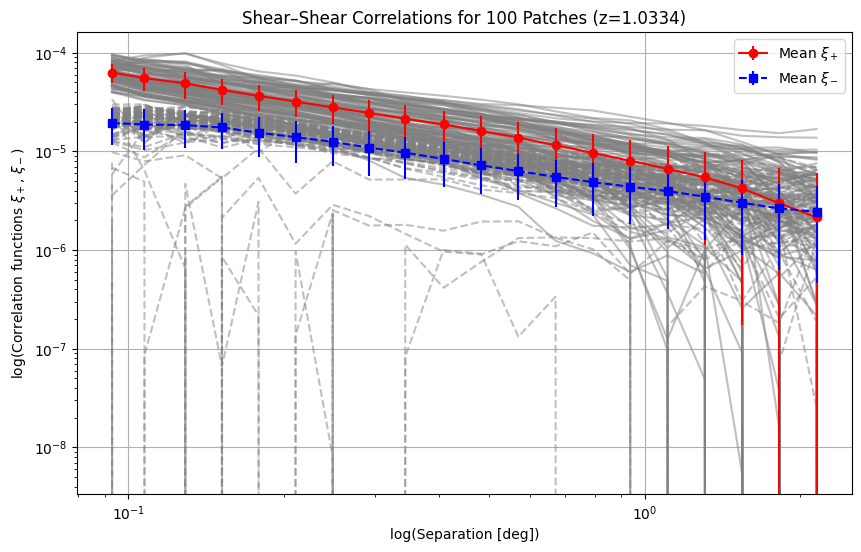

In [34]:
# SAME BUT IN DEGREES
# ------------------------------------------------------------
# 0.  Imports & data you already have
# ------------------------------------------------------------
import numpy as np
import healpy as hp
import treecorr
from numpy.random import default_rng
import matplotlib.pyplot as plt

# γ maps (already read):
#   gamma1_z1, gamma2_z1  –  full‑sky HEALPix arrays
nside = hp.get_nside(gamma1_z2)
npix  = hp.nside2npix(nside)

# ------------------------------------------------------------
# 1.  Patch geometry  (choose a radius that fits your max_sep)
# ------------------------------------------------------------
patch_radius_deg = 2.5              # 3°  (≈ 180 arcmin > 140 max_sep)
patch_radius_rad = np.radians(patch_radius_deg)

# ------------------------------------------------------------
# 2.  Draw 100 random, non‑overlapping patch centres
# ------------------------------------------------------------
rng          = default_rng(12345)
centers_th   = []
centers_ph   = []

while len(centers_th) < 100:
    # random point on the sphere
    u = rng.random(); v = rng.random()
    theta  = np.arccos(1 - 2*u)          # [0, π]
    phi    = 2 * np.pi * v               # [0, 2π)

    # check against existing centres
    ok = True
    for th0, ph0 in zip(centers_th, centers_ph):
        # great‑circle distance
        cos_d = (np.sin(th0)*np.sin(theta)*np.cos(ph0-phi) +
                 np.cos(th0)*np.cos(theta))
        d = np.arccos(np.clip(cos_d, -1, 1))
        if d < 2*patch_radius_rad:       # overlap → reject
            ok = False
            break
    if ok:
        centers_th.append(theta)
        centers_ph.append(phi)

centers_th = np.array(centers_th)
centers_ph = np.array(centers_ph)

# ------------------------------------------------------------
# 3.  Pre‑allocate output arrays (100 × 15)
# ------------------------------------------------------------
nbins = 20
xip_arr_z2 = np.zeros((100, nbins))
xim_arr_z2 = np.zeros((100, nbins))
theta_arr = None                       # store bin centres once

# TreeCorr parameters
gg_cfg = dict(min_sep = 5.0*0.0166667,           # deg
              max_sep = 140.0*0.0166667,
              nbins   = nbins,
              sep_units = 'arcmin')

# ------------------------------------------------------------
# 4.  Loop over patches
# ------------------------------------------------------------
for idx, (th0, ph0) in enumerate(zip(centers_th, centers_ph)):

    # 4a) pixel indices inside the disc
    pix = hp.query_disc(nside, vec=hp.ang2vec(th0, ph0),
                        radius=patch_radius_rad, inclusive=False)
    # filter unseen / NaN pixels
    m = (gamma1_z2[pix] != hp.UNSEEN) & np.isfinite(gamma1_z2[pix])
    pix = pix[m]

    if len(pix) < 20:          # skip tiny masks
        xip_arr_z2[idx] = np.nan
        xim_arr_z2[idx] = np.nan
        continue

    # 4b) build the TreeCorr catalogue
    theta, phi = hp.pix2ang(nside, pix)          # radians
    ra  = np.degrees(phi) #* 60.0                 # → deg
    dec = (90.0 - np.degrees(theta)) #* 60.0      # → deg

    cat = treecorr.Catalog(
            ra  = ra,
            dec = dec,
            g1  = gamma1_z2[pix],
            g2  = gamma2_z2[pix],
            ra_units  = 'arcmin',
            dec_units = 'arcmin',
            flip_g1   = True)

    # 4c) correlation
    gg = treecorr.GGCorrelation(**gg_cfg)
    gg.process(cat)

    # 4d) store
    xip_arr_z2[idx] = gg.xip
    xim_arr_z2[idx] = gg.xim
    if theta_arr is None:
        theta_arr = gg.meanr           # save bin centres once

    #print(f"Patch {idx+1:3d}/100   Npix={len(pix):6d}")

# ------------------------------------------------------------
# 5.  xip_arr and xim_arr now contain shape = (100, 15)
# ------------------------------------------------------------
print("Done!  xip_arr_z2.shape:", xip_arr_z2.shape)
print("       xim_arr_z2.shape:", xim_arr_z2.shape)

# Compute mean and standard deviation
mean_xip_z2 = np.nanmean(xip_arr_z2, axis=0)
std_xip_z2 = np.nanstd(xip_arr_z2, axis=0)
mean_xim_z2 = np.nanmean(xim_arr_z2, axis=0)
std_xim_z2 = np.nanstd(xim_arr_z2, axis=0)

# Plot individual 2PCFs
plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(theta_arr, xip_arr_z2[i, :], color='grey', alpha=0.5)
    plt.plot(theta_arr, xim_arr_z2[i, :], color='grey', alpha=0.5, linestyle='--')

# Plot mean with error bars
plt.errorbar(theta_arr, mean_xip_z2, yerr=std_xip_z2, color='red', marker='o', linestyle='-', label=r'Mean $\xi_+$')
plt.errorbar(theta_arr, mean_xim_z2, yerr=std_xim_z2, color='blue', marker='s', linestyle='--', label=r'Mean $\xi_-$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Separation [deg])')
plt.ylabel(r'log(Correlation functions $\xi_+$, $\xi_-$)')
plt.title('Shear–Shear Correlations for 100 Patches (z=1.0334)')
plt.legend()
plt.grid(True)
plt.show()

# P2.7: Comparing theory calculations of the shear 2PCFs against the measurements from the simulation

Load and plot the theoretical curves for $z_{s,1}$ and $z_{s,2}$ (that you computed on the first day in P1.7) together with the average of the measurements from the Takahashi simulations (that you computed in P2.5 and P2.6). Compare the theoretical curves to your measurements and see whether they agree or not.

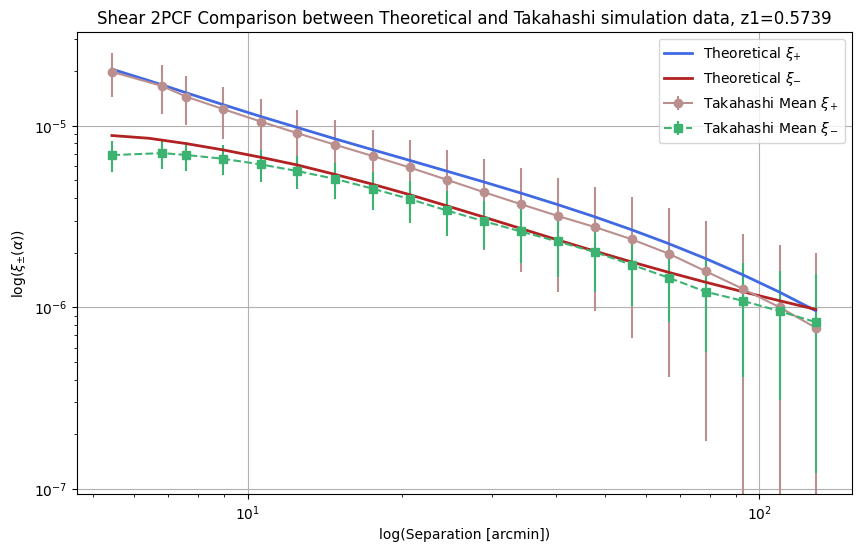

In [26]:
# Write your code here. Add more coding cells as needed.
# for zs1 = 0.5739

data = np.loadtxt('shear_2pcf_results_z1.txt')

sep=data[:,0]
xip_z1=data[:,1]
xim_z1=data[:,2]

plt.figure(figsize=(10, 6))
#for i in range(100):
 #   plt.plot(theta_arr, xip_arr[i, :], color='grey', alpha=0.5)
  #  plt.plot(theta_arr, xim_arr[i, :], color='grey', alpha=0.5, linestyle='--')
# Plot mean with error bars
plt.errorbar(theta_arr, mean_xip, yerr=std_xip, color='rosybrown', marker='o', linestyle='-', label=r'Takahashi Mean $\xi_+$')
plt.errorbar(theta_arr, mean_xim, yerr=std_xim, color='mediumseagreen', marker='s', linestyle='--', label=r'Takahashi Mean $\xi_-$')
plt.plot(sep, xip_z1, color='royalblue',linewidth=2, label=r'Theoretical $\xi_{+}$')
plt.plot(sep, xim_z1, color='firebrick', linewidth=2, label=r'Theoretical $\xi_{-}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel('log(Separation [arcmin])')
plt.ylabel(r'log($\xi_{\pm}(\alpha)$)')
plt.title('Shear 2PCF Comparison between Theoretical and Takahashi simulation data, z1=0.5739')
plt.show()

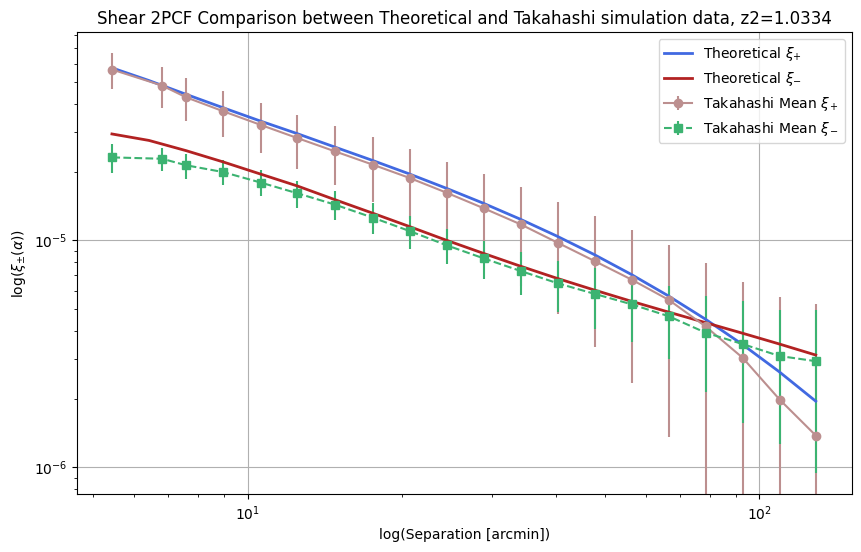

In [ ]:
# Write your code here. Add more coding cells as needed.
# for zs2 = 1.0334

data2 = np.loadtxt('shear_2pcf_results_z2.txt')

sep=data2[:,0]
xip_z2=data2[:,1]
xim_z2=data2[:,2]

plt.figure(figsize=(10, 6))
#for i in range(100):
 #   plt.plot(theta_arr, xip_arr_z2[i, :], color='grey', alpha=0.5)
  #  plt.plot(theta_arr, xim_arr_z2[i, :], color='grey', alpha=0.5, linestyle='--')
# Plot mean with error bars
plt.errorbar(theta_arr, mean_xip_z2, yerr=std_xip_z2, color='rosybrown', marker='o', linestyle='-', label=r'Takahashi Mean $\xi_+$')
plt.errorbar(theta_arr, mean_xim_z2, yerr=std_xim_z2, color='mediumseagreen', marker='s', linestyle='--', label=r'Takahashi Mean $\xi_-$')
plt.loglog(sep, xip_z2, color='royalblue',linewidth=2, label=r'Theoretical $\xi_{+}$')
plt.loglog(sep, xim_z2, color='firebrick', linewidth=2, label=r'Theoretical $\xi_{-}$')
plt.legend()
plt.grid()
plt.xlabel('log(Separation [arcmin])')
plt.ylabel(r'log($\xi_{\pm}(\alpha)$)')
plt.title('Shear 2PCF Comparison between Theoretical and Takahashi simulation data, z2=1.0334')
plt.show()